In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numba import jit, njit

In [3]:
%%time
N=100
M=N

temp=1.0
eps=0.0001
maxiter = 1000

T_old = np.zeros([M,N])
T_new = np.zeros([M,N])

T_old[0,:]=np.ones(N)*temp
T_new[0,:]=np.ones(N)*temp

count = 0
err=eps+0.1

T_old[0,:]=np.ones(N)*temp
T_new[0,:]=np.ones(N)*temp
    
T_old[M-1,:]=np.zeros(N)
T_new[M-1,:]=np.zeros(N)
    
T_old[:,0]=np.zeros(M)
T_new[:,0]=np.zeros(M)
    
T_old[:,N-1]=np.zeros(M)
T_new[:,N-1]=np.zeros(M)

@njit
def step(T_old, T_new):
    err = 0
    for i in arange(1,M-1):
        for j in arange(1, N-1):
            T_new[i,j]=0.25*(T_old[i+1,j]+T_old[i-1,j]+T_old[i,j+1]+T_old[i,j-1])
    
    for i in arange(1,M-1):
        for j in arange(1, N-1):
            T_old[i,j]=0.25*(T_new[i+1,j]+T_new[i-1,j]+T_new[i,j+1]+T_new[i,j-1])
            err = max(err, abs(T_old[i,j]-T_new[i,j]))
    return err


while (count<maxiter)and(err>eps):
    err=0
#     for i in arange(1,M-1):
#         for j in arange(1, N-1):
#             T_new[i,j]=0.25*(T_old[i+1,j]+T_old[i-1,j]+T_old[i,j+1]+T_old[i,j-1])
    
#     for i in arange(1,M-1):
#         for j in arange(1, N-1):
#             T_old[i,j]=0.25*(T_new[i+1,j]+T_new[i-1,j]+T_new[i,j+1]+T_new[i,j-1])
#             err = max(err, abs(T_old[i,j]-T_new[i,j]))
    err = step(T_old, T_new)
    if(count%100==0):
        print(count, err)
        
    count=count+2

0 0.125
100 0.0023731033271173763
200 0.0011983270359995357
300 0.0008008944606341384
400 0.0006013629689569644
500 0.0004803286085833802
600 0.000398339790855351
700 0.00033896557285739704
800 0.00029361121123638867
900 0.000257623777388305
CPU times: user 851 ms, sys: 16.8 ms, total: 868 ms
Wall time: 877 ms


517 +- 45 ms with njit, 542 +-69 with jit, 35.4 +- 1.26 without anything

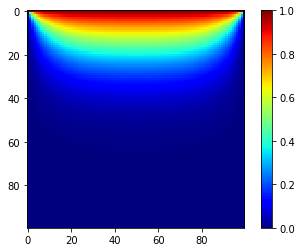

In [4]:
imshow(T_old, cmap=jet())
colorbar()

In [6]:
data=genfromtxt('out_laplace.txt')

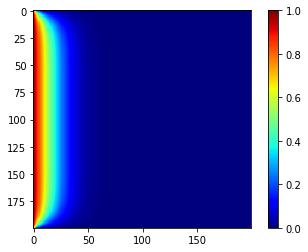

In [7]:
imshow(data, aspect='equal')
colorbar()
#xlim(0,200)

In [54]:
np.shape(data)

(128, 128)

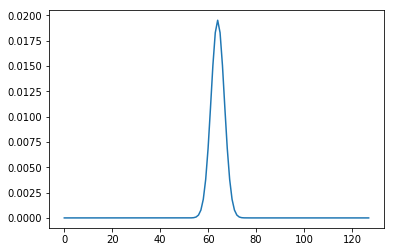

In [55]:
plt.plot(np.arange(128), data[63, :])

In [4]:
import imageio

In [5]:
im = imageio.imread('Lenna.png')

In [9]:
im.shape

(512, 512, 3)

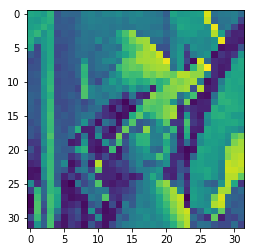

In [61]:
plt.imshow(im[::16,::16,1])

In [62]:
skip = 16

one_layer_img = np.array(im[::skip,::skip,0], dtype='float32')
np.savetxt('Lenna_R.txt', one_layer_img)
one_layer_img = np.array(im[::skip,::skip,1], dtype='float32')
np.savetxt('Lenna_G.txt', one_layer_img)
one_layer_img = np.array(im[::skip,::skip,2], dtype='float32')
np.savetxt('Lenna_B.txt', one_layer_img)

In [24]:
one_layer_img.dtype

dtype('float32')